Step 1 and Step 2.1:

Read the dataset into a Pandas DataFrame!

Does the dataset include any missing values? If so, delete the missing values entries!

Ends up deleting the last column as it is entirely full of NaN which makes the information useless/entered incorrectly

In [1]:
import pandas as pd
import numpy as np 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
lenc=LabelEncoder()
ohenc=OneHotEncoder()
df=pd.read_csv('data.csv')
df.dropna(inplace=True,axis=1) #Drops missing values
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Step 3:

Choose the features you think are relevant to our analysis! There are a lot of features in this dataset but we have to make our model’s training time reasonable for you.

I removed the ID column along with anything that isnt a mean as I decided to see if there was a correlation between the Mean of certain features compared to the diagnosis

In [2]:
df =df.drop('id',axis=1)
df = df.drop(df.iloc[:, 11:31], axis=1)
df


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016


Step 4:

Perform any needed pre-processing on the chosen features including:

Scaling.

Encoding.

Dealing with Nan values.

Normalization.

Well I did some of it beforehand like dealing with NaN values so I decided to scale the first 4 means as its way too large to glean any data by comparing it to the other means on the list. I encoded the diagnosis to enable counting the total % of each diagnosis along with make it easier to deal with later on and added it to its own column so I can utilise the original column and compare them to confirm the results

In [3]:
scal_feat = df.copy()
col_names = ['radius_mean', 'texture_mean','perimeter_mean','area_mean']
feat = scal_feat[col_names]
scaler = StandardScaler().fit(feat.values)
feat = scaler.transform(feat.values)
scal_feat[col_names] = feat
df = scal_feat
df['diagnosis_encoded']= lenc.fit_transform(df.diagnosis.values)
df.to_csv('data_refined.csv')

In [4]:
pd.read_csv('data_refined.csv')

,Unnamed: 0,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,diagnosis_encoded
0,0,M,1.097064,-2.073335,1.269934,0.984375,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1
1,1,M,1.829821,-0.353632,1.685955,1.908708,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,1
2,2,M,1.579888,0.456187,1.566503,1.558884,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,1
3,3,M,-0.768909,0.253732,-0.592687,-0.764464,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,1
4,4,M,1.750297,-1.151816,1.776573,1.826229,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,564,M,2.110995,0.721473,2.060786,2.343856,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1
565,565,M,1.704854,2.085134,1.615931,1.723842,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,1
566,566,M,0.702284,2.045574,0.672676,0.577953,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,1
567,567,M,1.838341,2.336457,1.982524,1.735218,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,1


Step 5/6:

Pair Plots for the features.

Correlation Matrix heat map.

Box plots for the features.

Visualize your data in violin plots.

Describe what a violin plot is.

Determine whether or not some of the features have outliers based on your violin plots.


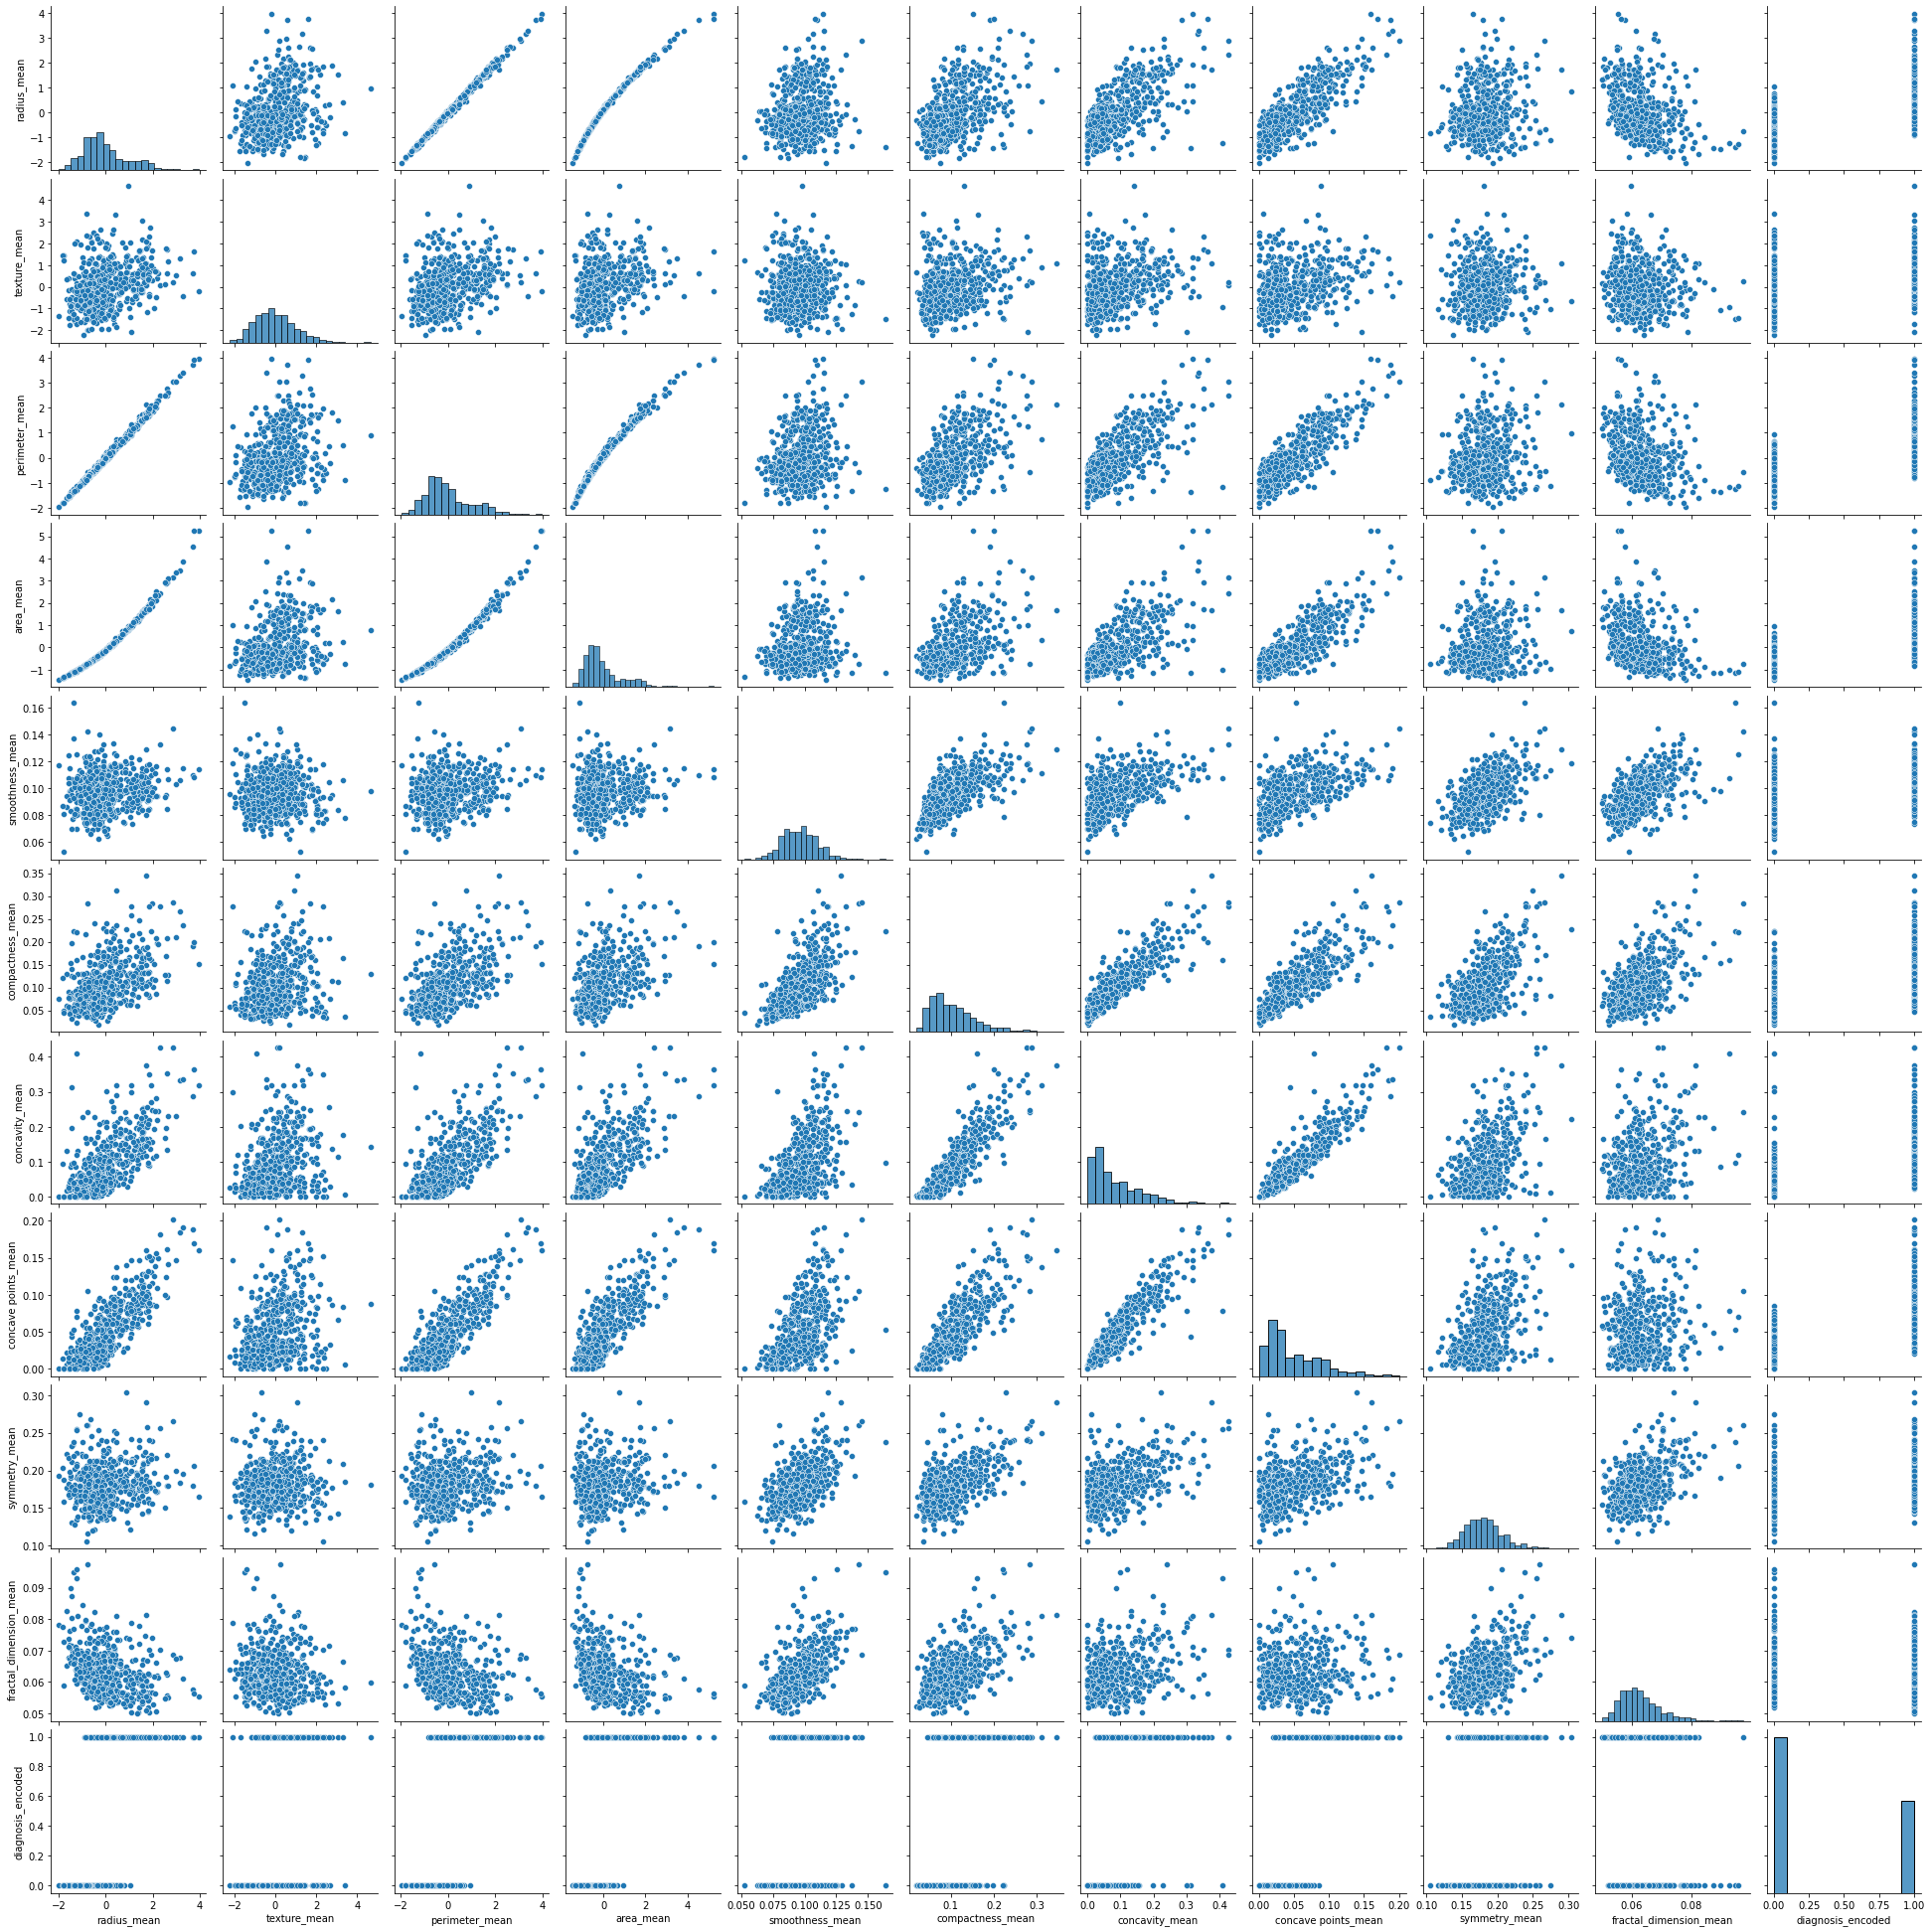

In [5]:
sns.pairplot(df)

<AxesSubplot:>

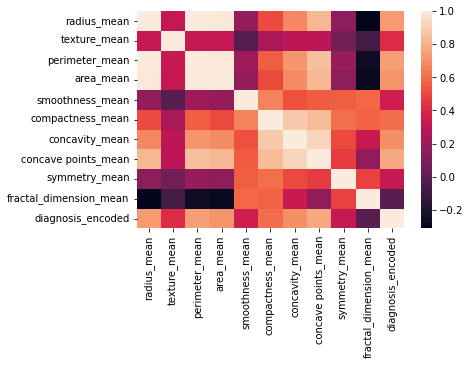

In [7]:
sns.heatmap(df.corr())

After viewing the heatmap I noticed that of all of them, concave points had the highest correlation and made a box plot which 

confirmed that the higher the average the more likely it was a diagnoisis of  B and the lower the average the more likely it 

being a diagnosis of M

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Concave Points Mean')

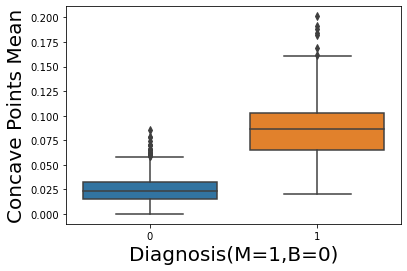

In [12]:
conc= df.iloc[:, 8]
concbox = sns.boxplot(df['diagnosis_encoded'],conc)
concbox.set_xlabel("Diagnosis(M=1,B=0)", fontsize = 20)
concbox.set_ylabel("Concave Points Mean", fontsize = 20)

By creating a violin plot, which allows you to see the higher density of the data along with the median while also clearly showing outliers as shown by where the line inside of the plot stops, you have a much easier time noticing the fact that Larger Concave Points(especially higher than .10) generally means you have type B cancer

It is also noticeable that while low, there are higher chances of having type M cancer should they be around the 0.025 mark and that we may have outliers higher than the .17 mark as anything above that is either almost guaranteed type B cancer or possibly measured incorrectly

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Concave Points Mean')

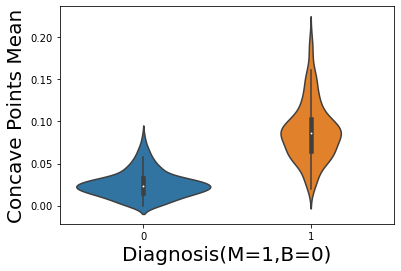

In [14]:
concvio= sns.violinplot(df['diagnosis_encoded'],conc)
concvio.set_xlabel("Diagnosis(M=1,B=0)", fontsize = 20)
concvio.set_ylabel("Concave Points Mean", fontsize = 20)